In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)

In [53]:
df = pd.read_csv(r'C:\Users\saqib\Desktop\Desktop_Icons\Programming_Practice\Datasets\heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [54]:
df.shape

(8763, 26)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [56]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [57]:
# Dropping columns having high number of unique values
df.drop('Patient ID',axis=1, inplace=True)

In [58]:
df.isna().sum().sum()

0

In [59]:
df[['bp_upper','bp_lower']] = df['Blood Pressure'].str.split('/',regex=False, expand=True).astype(int)
df.drop('Blood Pressure',axis=1,inplace=True)

In [48]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,bp_upper,bp_lower
0,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


C:\Users\saqib\AppData\Local\Temp\ipykernel_5060\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

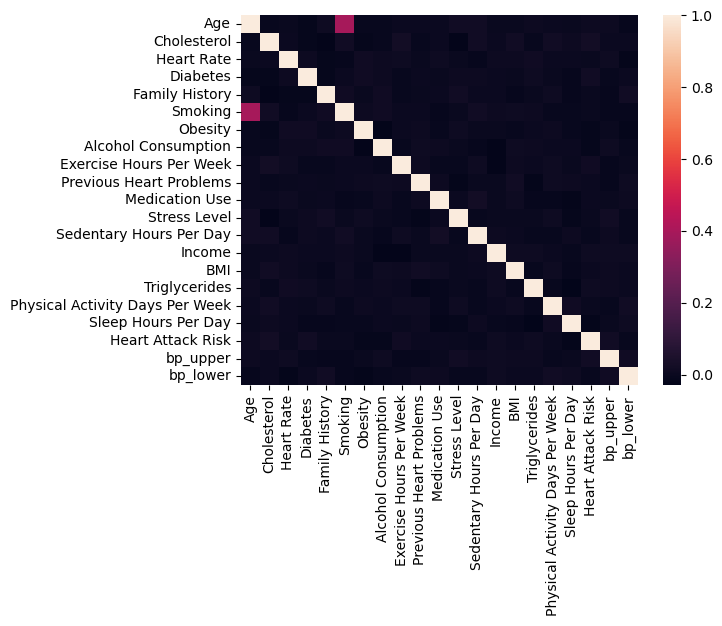

In [62]:
sns.heatmap(df.corr())

In [84]:
numerical_col = df.select_dtypes(include=['int','float']).columns
cat_col = df.select_dtypes(include=['object']).columns

num_col_idx = [df.columns.get_loc(col) for col in numerical_col]
cat_col_idx = [df.columns.get_loc(col) for col in cat_col]

print('Numerical columns : ', num_col_idx)
print('Categorical columns : ', cat_col_idx)

Numerical columns :  [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24, 25]
Categorical columns :  [1, 10, 20, 21, 22]


In [85]:
x = df.drop(['Heart Attack Risk'], axis=1)
y= df['Heart Attack Risk'].copy()
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.7, random_state=1, stratify=y)

In [94]:
trf1 = ColumnTransformer([
                            ('ohe_cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_col_idx)
                            ], remainder='passthrough')

In [95]:
trf2 = ColumnTransformer([
                            ('num_scale', MinMaxScaler(), num_col_idx)
                            ], remainder='passthrough')

In [96]:
trf3 = SelectKBest(score_func=chi2,k=10)

In [97]:
trf4 = DecisionTreeClassifier()

In [98]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])

In [99]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 10, 20, 21, 22])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scale', MinMaxScaler(),
                                                  [0, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 23, 24, 25])])),
                ('trf3',
                 SelectKBest(score_func=<function chi2 at 0x00000236722C3130>)),
                ('trf4', DecisionTreeClassifier())])

In [100]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 10, 20, 21, 22])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scale', MinMaxScaler(),
                                                  [0, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 23, 24, 25])])),
                ('trf3',
                 SelectKBest(score_func=<function chi2 at 0x00000236722C3130>)),
                ('trf4', DecisionTreeClassifier())])

In [103]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_cat',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 10, 20, 21, 22])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('num_scale', MinMaxScaler(),
                                  [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15,
                                   16, 17, 18, 19, 23, 24, 25])]),
 'trf3': SelectKBest(score_func=<function chi2 at 0x00000236722C3130>),
 'trf4': DecisionTreeClassifier()}

In [104]:
# Predict
y_pred = pipe.predict(x_test)

In [105]:
from sklearn.metrics import f1_score, accuracy_score

f1_score(y_test, y_pred)

0.3607085346215781

In [107]:
accuracy_score(y_test,y_pred)

0.5469760365157855

In [ ]:
# Accuracy is not the concern , Building Pipeline is important as of now.